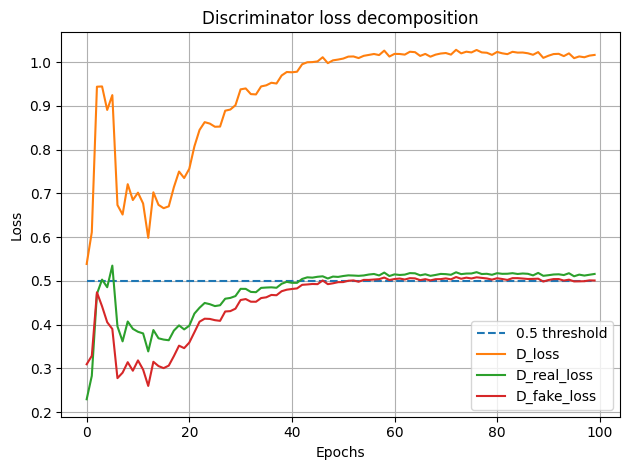

In [3]:
import numpy as np
import matplotlib.pyplot as plt

G_loss = np.load('metrics/100_0.0002_64/G_loss.npy')
D_loss = np.load('metrics/100_0.0002_64/D_loss.npy')
D_real_loss = np.load('metrics/100_0.0002_64/D_real_loss.npy')
D_fake_loss = np.load('metrics/100_0.0002_64/D_fake_loss.npy')
fid = np.load('metrics/100_0.0002_64/fid_values.npy')

#plt.plot(G_loss, label = 'G_loss')
plt.plot(0.5 * np.ones(D_loss.shape), '--', label = '0.5 threshold')
plt.plot(D_loss, label = 'D_loss')
plt.plot(D_real_loss, label ='D_real_loss')
plt.plot(D_fake_loss, label = 'D_fake_loss')
plt.title('Discriminator loss decomposition')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.tight_layout()
plt.legend()

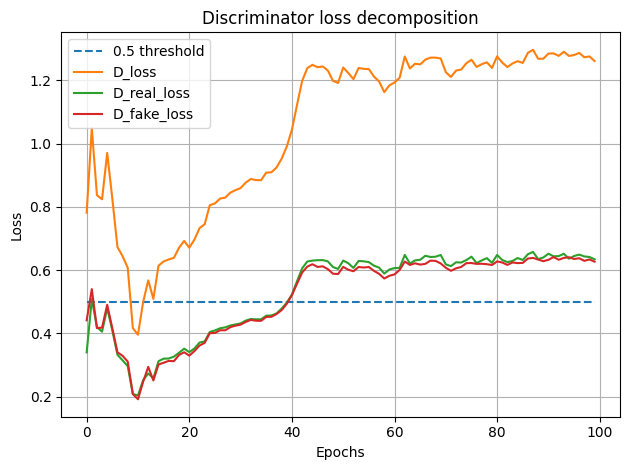

In [4]:
G_loss = np.load('metrics/epochs_100_lr_0.0002_batch_64_spectral_normalized/G_loss.npy')
D_loss = np.load('metrics/epochs_100_lr_0.0002_batch_64_spectral_normalized/D_loss.npy')
D_real_loss = np.load('metrics/epochs_100_lr_0.0002_batch_64_spectral_normalized/D_real_loss.npy')
D_fake_loss = np.load('metrics/epochs_100_lr_0.0002_batch_64_spectral_normalized/D_fake_loss.npy')
fid = np.load('metrics/epochs_100_lr_0.0002_batch_64_spectral_normalized/fid_values.npy')

#plt.plot(G_loss, label = 'G_loss')
plt.plot(0.5 * np.ones(D_loss.shape), '--', label = '0.5 threshold')
plt.plot(D_loss, label = 'D_loss')
plt.plot(D_real_loss, label ='D_real_loss')
plt.plot(D_fake_loss, label = 'D_fake_loss')
plt.title('Discriminator loss decomposition')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.tight_layout()
plt.legend()